## Que1.-
In this dataset you have to predict that whether we have to give ATTORNEY to the clients or not (0=Yes, 1=No) based on below factors.
CLMAGE - Age of Client
CLMSEX - Sex of client (0=Male, 1= Female)
SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
LOSS - Loss that client faced

Prepare model by using Naive Bayes,KNN and SVM & Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Dataset : Claimants.csv


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df1=pd.read_csv("claimants.csv")

In [128]:
df1

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [130]:
df1.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [133]:
df1['CLMSEX']=df1['CLMSEX'].fillna(df1['CLMSEX'].mode()[0])
df1['CLMINSUR']=df1['CLMINSUR'].fillna(df1['CLMINSUR'].mode()[0])
df1['SEATBELT']=df1['SEATBELT'].fillna(df1['SEATBELT'].mode()[0])
df1['CLMAGE']=df1['CLMAGE'].fillna(df1['CLMAGE'].mean())

In [135]:
df1.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [136]:
df1.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,0.009886,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.022444,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.044706,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.025379,0.111879
CLMAGE,0.009886,-0.022444,0.044706,-0.025379,1.000000,0.057641
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.057641,1.000000


<Axes: >

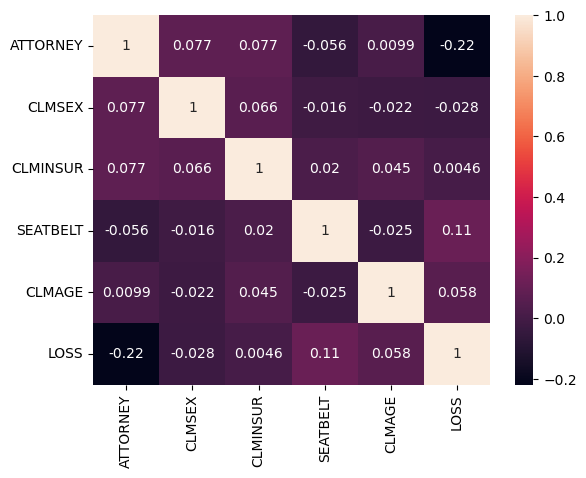

In [137]:
sns.heatmap(df1.corr(),annot=True)

In [138]:
X=df1.drop('ATTORNEY',axis=1)
y=df1['ATTORNEY']

In [139]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123456)


In [142]:
from sklearn.naive_bayes import GaussianNB
def naive_model():
    model=GaussianNB()
    model.fit(X_train,y_train)
    return model

In [144]:
from sklearn.neighbors import KNeighborsClassifier
def knn_model():
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train,y_train)
    return model

In [145]:
from sklearn.svm import SVC
def svc_model():
    model=SVC()
    model.fit(X_train,y_train)
    return model


In [146]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def evaluation(model):
    y_pred=model.predict(X_test)
    print(f"Accuracy:{accuracy_score(y_test,y_pred):.2f}")
    print(f"Precision:{precision_score(y_test,y_pred):.2f}")
    print(f"Recall:{recall_score(y_test,y_pred):.2f}")
    print(f"F1-score:{f1_score(y_test,y_pred):.2f}")
    print(f"Confusion matrix:{confusion_matrix(y_test,y_pred)}")
    tp,fp,fn,tn=confusion_matrix(y_test,y_pred).ravel()
    print("Accuracy by confusion matrix:",(tp+tn)/(tp+fp+tn+fn))
    

In [147]:
models=[]
models.append({"Name":"KNN","model":knn_model()})
models.append({"Name":"Naive Bayes","model":naive_model()})
models.append({"Name":"SVC","model":svc_model()})

In [148]:
for info in models:
    print(info)
    evaluation(info['model'])
    print()
    print()

{'Name': 'KNN', 'model': KNeighborsClassifier()}
Accuracy:0.65
Precision:0.62
Recall:0.70
F1-score:0.66
Confusion matrix:[[86 55]
 [38 89]]
Accuracy by confusion matrix: 0.6529850746268657


{'Name': 'Naive Bayes', 'model': GaussianNB()}
Accuracy:0.54
Precision:0.51
Recall:0.94
F1-score:0.66
Confusion matrix:[[ 27 114]
 [  8 119]]
Accuracy by confusion matrix: 0.5447761194029851


{'Name': 'SVC', 'model': SVC()}
Accuracy:0.67
Precision:0.61
Recall:0.85
F1-score:0.71
Confusion matrix:[[ 71  70]
 [ 19 108]]
Accuracy by confusion matrix: 0.667910447761194




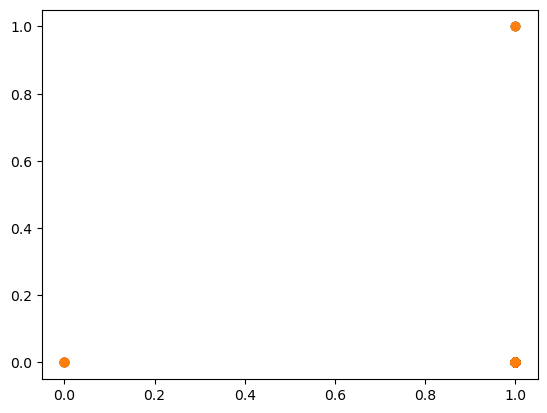

In [149]:
y_pred=knn_model().predict(X_test)
plt.scatter(X_test['CLMINSUR'][y_pred==1],X_test['SEATBELT'][y_pred==1])
plt.scatter(X_test['CLMINSUR'][y_pred==0],X_test['SEATBELT'][y_pred==0])

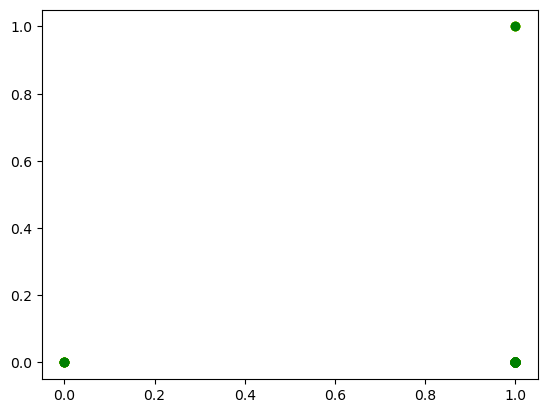

In [172]:
y_pred=svc_model().predict(X_test)
plt.scatter(X_test['CLMINSUR'][y_pred==1],X_test['SEATBELT'][y_pred==1],color="yellow")
plt.scatter(X_test['CLMINSUR'][y_pred==0],X_test['SEATBELT'][y_pred==0],color='green')

In [150]:
print(X_test.columns)

Index(['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')
